## Time Series on Gold Investments

In [1]:
# Load the Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the Data
df=pd.read_csv('Company Stock and Investment.csv')

In [3]:
# Preparing 3 indivuals  Time Series Models
# This is for Gold Investments
Gold_Data=pd.DataFrame(df[['Date','Gold Investments']])

In [4]:
# Info of the Data
Gold_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1984 non-null   object 
 1   Gold Investments  1984 non-null   float64
dtypes: float64(1), object(1)
memory usage: 31.1+ KB


In [5]:
#Check the Null values
Gold_Data.isnull().sum()

Date                0
Gold Investments    0
dtype: int64

In [6]:
#Convert the Date 
Gold_Data['Date'] = pd.to_datetime(Gold_Data['Date'], dayfirst=True).dt.date

In [7]:
#Get the Year from the Date
Gold_Data['myear'] =  pd.to_datetime(Gold_Data['Date']).dt.year

In [8]:
#Analyis the Last 3 years data 
Gold_Data=Gold_Data[Gold_Data['myear']>2012]

In [9]:
#Get the Month Year from the Date
Gold_Data['month_year'] =  pd.to_datetime(Gold_Data['Date']).dt.to_period('M')

In [10]:
#Get the unique Month Year from the Date
Gold_Data['month_year'].unique()

<PeriodArray>
['2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06', '2013-07',
 '2013-08', '2013-09', '2013-10', '2013-11', '2013-12', '2014-01', '2014-02',
 '2014-03', '2014-04', '2014-05', '2014-06', '2014-07', '2014-08', '2014-09',
 '2014-10', '2014-11', '2014-12', '2015-01', '2015-02', '2015-03', '2015-04',
 '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11',
 '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
 '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01',
 '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
 '2017-09', '2017-10', '2017-11']
Length: 59, dtype: period[M]

In [11]:
#Drop the myear column
Gold_Data.drop('myear',axis=1,inplace=True)
# Date

In [12]:
#Drop the Date column
Gold_Data.drop('Date',axis=1,inplace=True)

In [13]:
# aggerate (group by ) the OilInvestments by Year,Month
Gold_invest=Gold_Data.groupby(Gold_Data['month_year'], as_index=False).agg({"Gold Investments": "max"})
# data.groupby('month', as_index=False).agg({"duration": "sum"})

In [14]:
Gold_invest.head()

,month_year,Gold Investments
0,2013-01,0.010406
1,2013-02,0.008645
2,2013-03,0.009500
3,2013-04,0.015751
4,2013-05,0.035091


In [15]:
# oilData=oil_invest

In [16]:
Gold_invest['month_year']=Gold_invest['month_year'].astype('period[D]')

# pd.Period(oil_invest['month_year'], freq='D')

In [17]:
Gold_invest['month_year']=Gold_invest['month_year'].dt.strftime('%Y-%m-%d')

In [18]:
Gold_invest.describe()

,Gold Investments
count,59.000000
mean,0.018263
std,0.009786
min,0.006185
25%,0.011086
50%,0.015751
75%,0.021981
max,0.049577


In [19]:

# IQR score technique to remove Outliers 
Q1 = Gold_invest.quantile(0.25)
Q3 = Gold_invest.quantile(0.75)
IQR = Q3 - Q1
print(Gold_invest.shape)
dfIQR = Gold_invest[~((Gold_invest < (Q1-1.5 * IQR)) |(Gold_invest > (Q3 + 1.5 * IQR))).any(axis=1)]
dfIQR.shape

# Nearly 100 rows detected as outliers

(59, 2)


(55, 2)

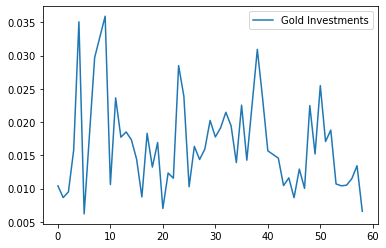

In [20]:
dfIQR.plot()

## check if data is stationary or not.

In [21]:

#Ho: It is non stationary
#H1: It is stationary
from statsmodels.tsa.stattools import adfuller
def adfuller_test(sales):
    result=adfuller(sales) # same as above ,variable name changed
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary")
    else:
        print("weak evidence against null hypothesis, time series is non-stationary ")
    

In [22]:
adfuller_test(dfIQR['Gold Investments'])

ADF Test Statistic : -6.600288573437374
p-value : 6.762651814345803e-09
#Lags Used : 0
Number of Observations Used : 54
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data  is stationary


In [23]:
GoldData=dfIQR

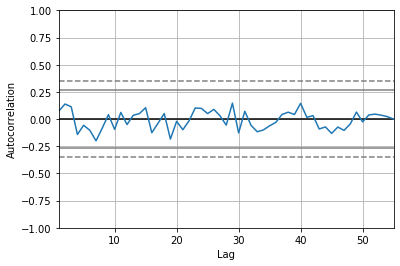

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(GoldData['Gold Investments'])
plt.show()

In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [26]:
GoldData.set_index('month_year',inplace=True)

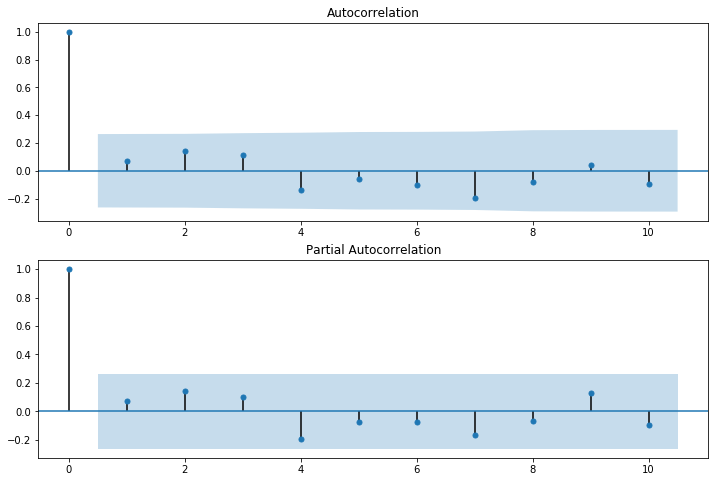

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
# First 12 values are null so we will start from 13
fig = sm.graphics.tsa.plot_acf(GoldData['Gold Investments'],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(GoldData['Gold Investments'],lags=10,ax=ax2)

In [28]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# Usually in seasonal data we avoid arima ,just showing u how to impliment
from statsmodels.tsa.arima_model import ARIMA

In [29]:
model=ARIMA(GoldData['Gold Investments'],order=(1,1,1)) # this order is p d q(0 or 1) 
model_fit=model.fit()

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:     D.Gold Investments   No. Observations:                   54
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 190.577
Method:                       css-mle   S.D. of innovations              0.007
Date:                Fri, 23 Oct 2020   AIC                           -373.154
Time:                        05:20:56   BIC                           -365.198
Sample:                             1   HQIC                          -370.086
                                                                              
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -6.932e-05   6.25e-05     -1.110      0.267      -0.000    5.31e-05
ar.L1.D.Gold Investments     0.0728      0.140      0.521      0.602      -0.201       0.347
ma.L1.D.Gold Investments    -0.9999      0.060    -16.775      0.000      -1.117      -0.883
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           13.7285           +0.0000j           13.7285            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [31]:
GoldData.shape

(55, 1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


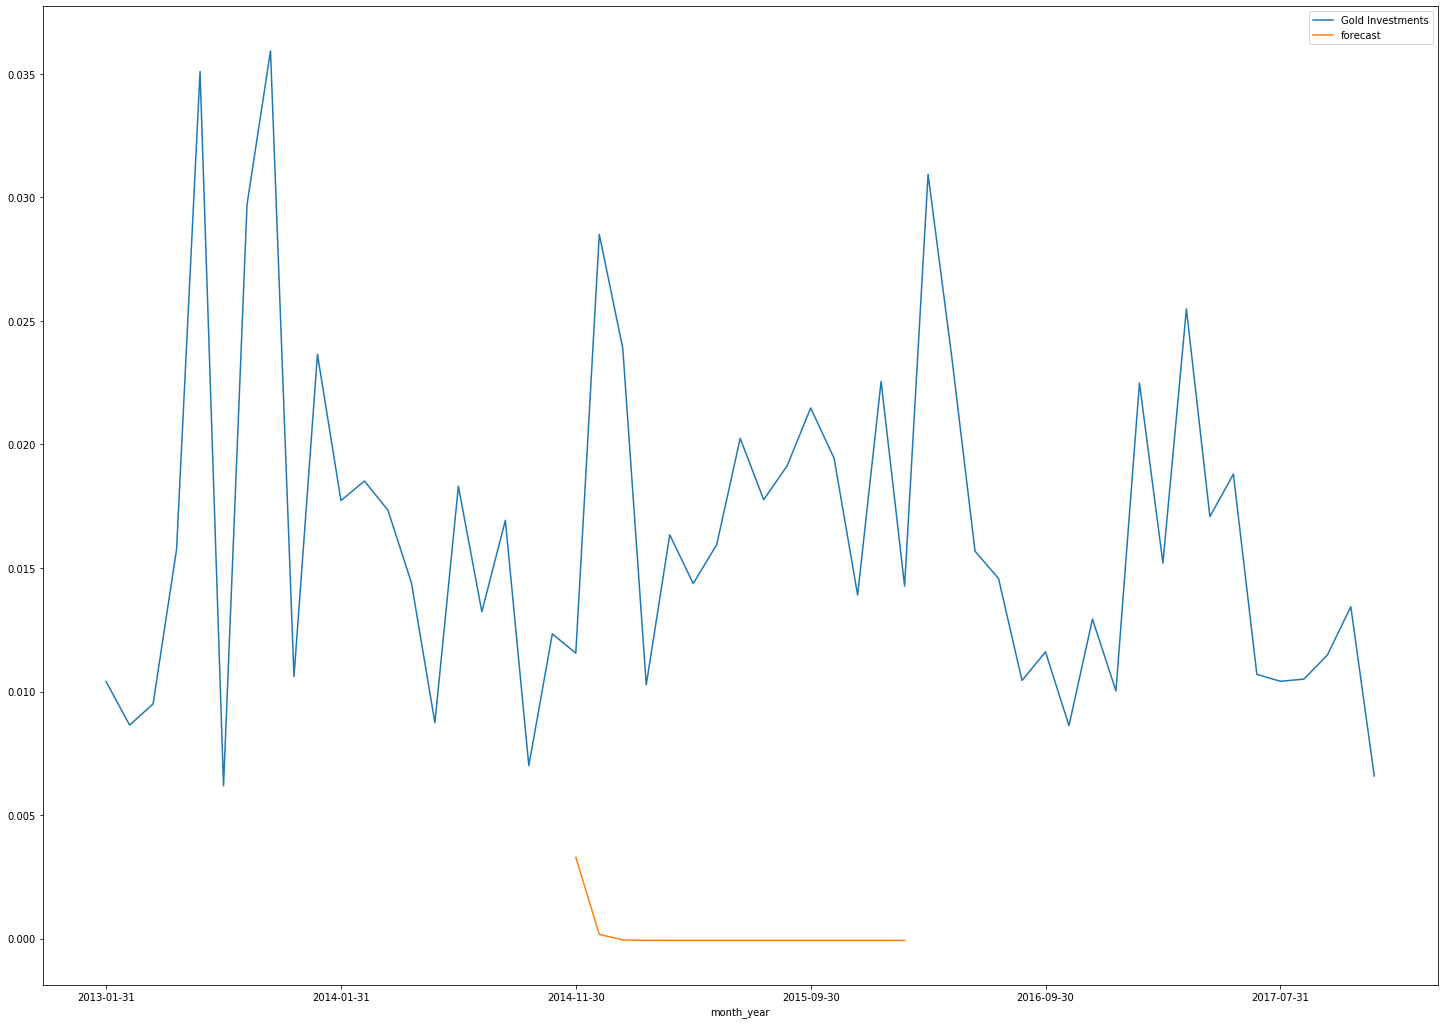

In [32]:
GoldData['forecast']=model_fit.predict(start=20,end=34,dynamic=True)
GoldData[['Gold Investments','forecast']].plot(figsize=(25,18))

In [33]:
import statsmodels.api as sm  # SARIMAX - seasonal arimax (i.e, Every 12 months)

In [48]:
# (i.e, Every 12 months) seasonal_order
model=sm.tsa.statespace.SARIMAX(GoldData['Gold Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
results=model.fit()

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


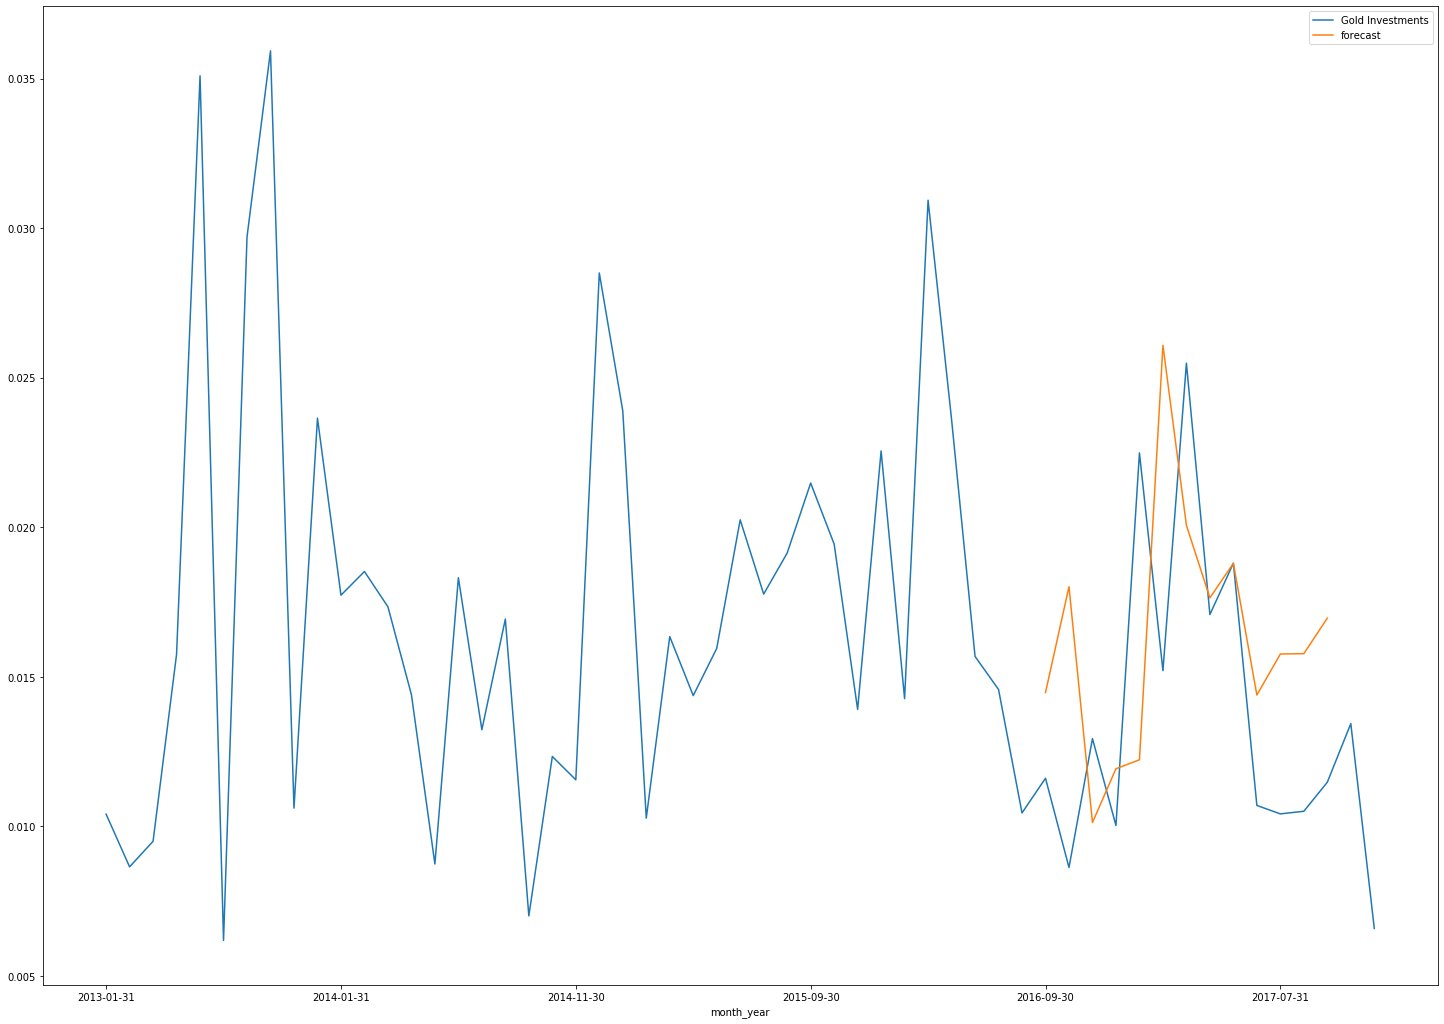

In [49]:
GoldData['forecast']=results.predict(start=40,end=52,dynamic=True)
GoldData[['Gold Investments','forecast']].plot(figsize=(25,18))

### Preparing the TestData

In [50]:
# Preparing the TestData
from pandas.tseries.offsets import DateOffset
future_dates=[pd.to_datetime(GoldData.index[-1]).date()+DateOffset(months=x) for x in range(0,24)]


In [51]:
future_dates[0].date()

datetime.date(2017, 11, 30)

In [53]:
future_dateset_df=pd.DataFrame(index=future_dates[1:],columns=GoldData.columns)

In [54]:
future_dateset_df

,Gold Investments,forecast
2017-12-30,NaN,NaN
2018-01-30,NaN,NaN
2018-02-28,NaN,NaN
2018-03-30,NaN,NaN
2018-04-30,NaN,NaN
2018-05-30,NaN,NaN
2018-06-30,NaN,NaN
2018-07-30,NaN,NaN
2018-08-30,NaN,NaN
2018-09-30,NaN,NaN


In [56]:
#Combine the Data
future_df=pd.concat([GoldData,future_dateset_df])

In [57]:
future_df.reset_index(inplace=True)

In [58]:
future_df['index']=pd.to_datetime(future_df['index']).dt.date

In [59]:
future_df.set_index('index',inplace=True)

In [60]:
future_df.shape

(78, 2)

In [66]:
model=sm.tsa.statespace.SARIMAX(future_df['Gold Investments'],order=(1, 1, 1),seasonal_order=(1,1,1,12)) #(p,d,q,Shift)
M_results=model.fit()

C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1006: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\lenovo\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


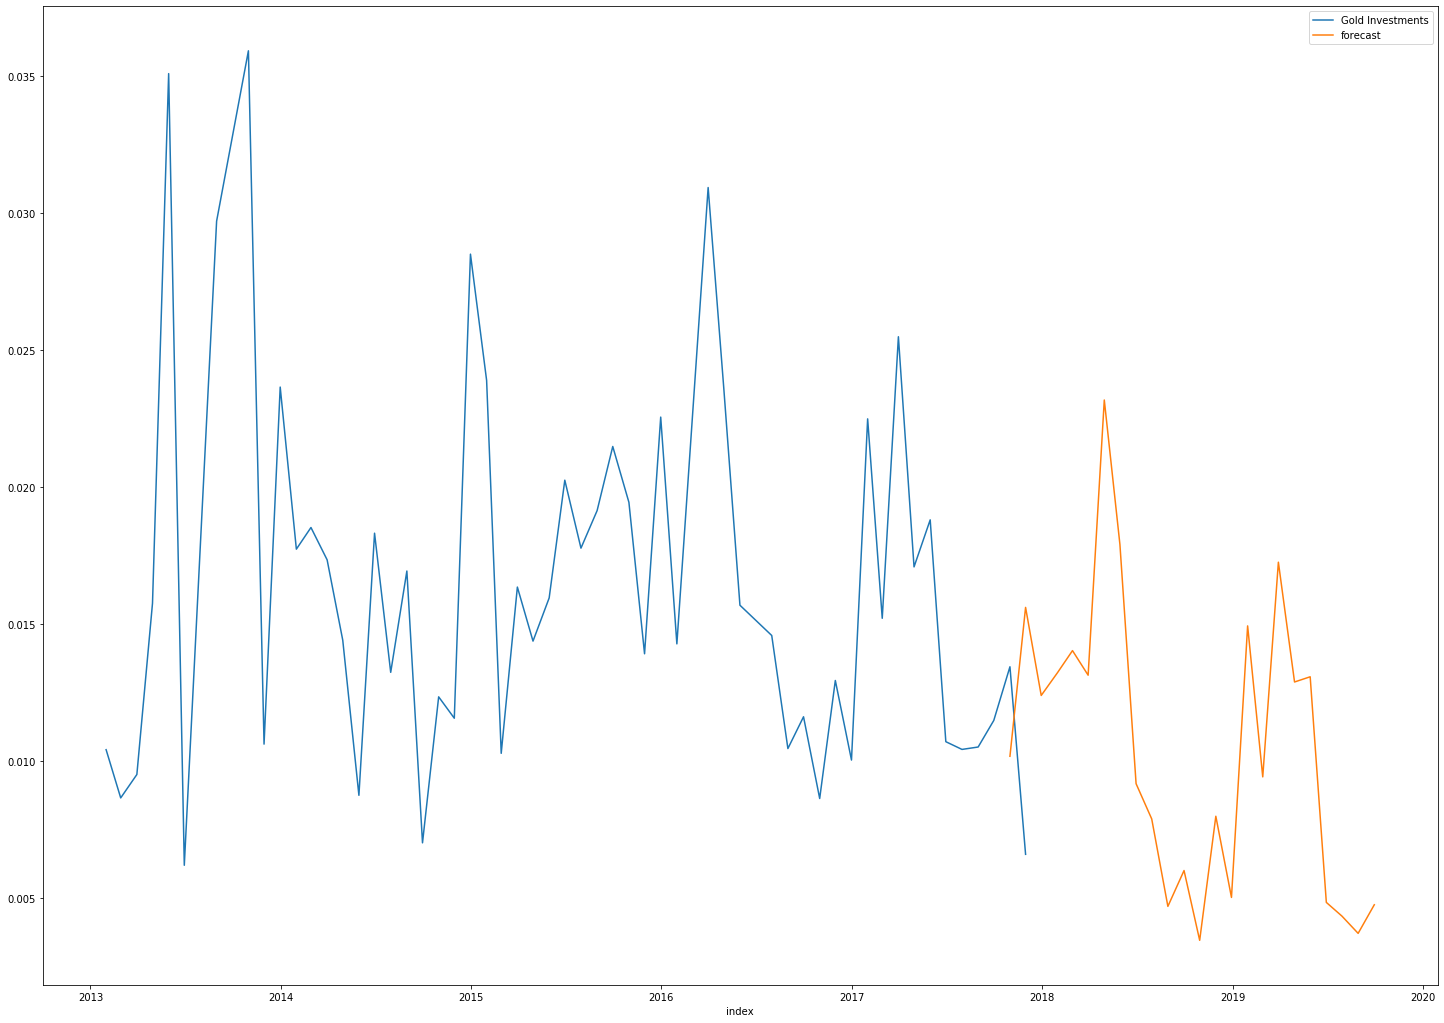

In [72]:
future_df['forecast']=M_results.predict(start=53,end=76,dynamic=True)
future_df[['Gold Investments','forecast']].plot(figsize=(25,18))